# Reinforcement Learning

In [ ]:
!pip install -U gym

In [ ]:
!pip install gym[box2d] pygame pyglet==1.5.27


In [22]:
import gym
env = gym.make("CartPole-v1", render_mode="human")
obs = env.reset()
obs

(array([ 0.00518158,  0.01868294, -0.01723305,  0.0323808 ], dtype=float32),
 {})

In [9]:
gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4'])

In [29]:
import gym
import time

env = gym.make("CartPole-v1", render_mode="human")
obs, _ = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)

    time.sleep(.5) 

env.close()


Average reward over 500 episodes: 42.308


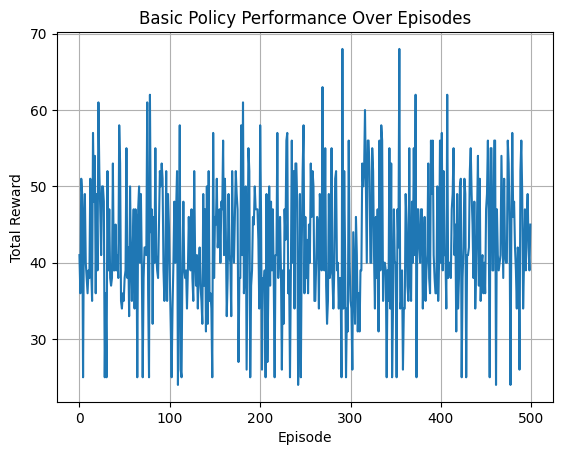

In [30]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt

# Define the policy
def basic_policy(obs):
    angle = obs[2]  # Pole angle
    return 0 if angle < 0 else 1  # Move left if leaning left, else right

# Create environment with rendering
env = gym.make("CartPole-v1", render_mode="human")

totals = []

# Run 500 episodes
for episode in range(500):
    obs, _ = env.reset()
    episode_rewards = 0

    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward

        time.sleep(0.02)  # Slow down for visualization

        if done or truncated:
            break

    totals.append(episode_rewards)

env.close()

# Show results
print(f"Average reward over 500 episodes: {np.mean(totals)}")

# Optional: plot the episode rewards
plt.plot(totals)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Basic Policy Performance Over Episodes")
plt.grid()
plt.show()


# Using Neural Network For policy

In [32]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# --- Step 1: Define basic policy to collect data ---
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

# --- Step 2: Generate training data ---
env = gym.make("CartPole-v1")
X = []
y = []

for episode in range(1000):
    obs, _ = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        X.append(obs)
        y.append(action)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break

X = np.array(X)
y = np.array(y)



c:\Users\SIVERMA\Documents\Experimenting\AGENT\AGENTS\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [39]:
# --- Step 3: Define the model you shared ---
n_inputs = 4  # Number of features in observation
model = keras.models.Sequential([
    keras.layers.Dense(5, activation="selu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



Epoch 1/10


2638/2638 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6763 - loss: 0.5676
Epoch 2/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9415 - loss: 0.1672
Epoch 3/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9713 - loss: 0.0887
Epoch 4/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9876 - loss: 0.0496
Epoch 5/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9935 - loss: 0.0316
Epoch 6/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9961 - loss: 0.0228
Epoch 7/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9970 - loss: 0.0167
Epoch 8/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9977 - loss: 0.0130
Epoch 9/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9976 - loss: 0.0115
Epoch 10/10
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9984 - loss: 0.0093


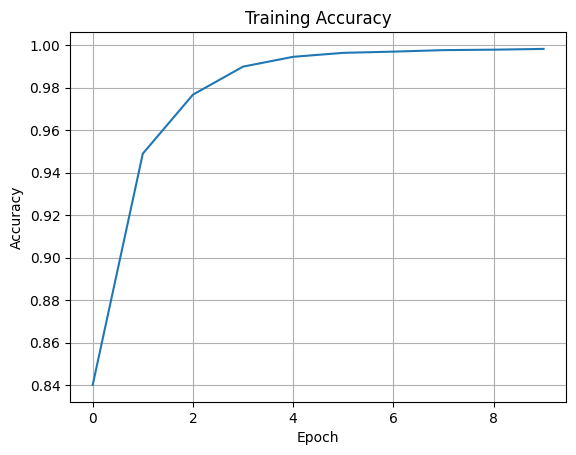

In [40]:

# --- Step 4: Train the model ---
history = model.fit(X, y, epochs=10, batch_size=16)

# Optional: Plot training accuracy
plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [41]:
import time

# Use Gym with rendering
env = gym.make("CartPole-v1", render_mode="human")

episode_rewards = []

for episode in range(10):  # Run 10 evaluation episodes
    obs, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Predict action using trained model
        prob = model.predict(obs.reshape(1, -1), verbose=0)[0][0]
        action = int(prob >= 0.5)  # threshold 0.5 for binary output

        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        time.sleep(0.02)

        if done or truncated:
            break

    episode_rewards.append(total_reward)

env.close()

# Results
print("Episode rewards:", episode_rewards)
print("Average reward:", np.mean(episode_rewards))


Episode rewards: [36.0, 48.0, 55.0, 42.0, 34.0, 46.0, 36.0, 52.0, 35.0, 34.0]
Average reward: 41.8


In [42]:
reward

1.0

# With Neural Network

**if my model predicts that .1 menaing left is 10 % and the sample i just did is gave 5 meaning .05>.1 meaning false and result will be action should be 1 meaning right ,so now the loss will be -log(.1) x 80 if reward is 80 and thos loss will be 80 now model will see this large loss and will optimize the weight to push next time such input values toward .8 or .9  so meaning go toward left more chances**

In [47]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Build policy network
model = keras.models.Sequential([
    keras.layers.Dense(16, activation='elu', input_shape=[4]),
    keras.layers.Dense(1, activation='sigmoid')  # output = probability of action 1 (right)
])
optimizer = keras.optimizers.Adam(learning_rate=0.01)


In [44]:
def discount_rewards(rewards, gamma=0.95):
    discounted = np.zeros_like(rewards, dtype=np.float32)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = rewards[t] + gamma * running_add
        discounted[t] = running_add
    return discounted


In [46]:
env = gym.make("CartPole-v1")
n_episodes = 50
all_rewards = []

for episode in range(n_episodes):
    obs_list = []
    action_list = []
    reward_list = []

    obs, _ = env.reset()
    done = False

    while not done:
        # Predict action probability
        prob = model.predict(obs.reshape(1, -1), verbose=0)[0][0]
        action = 1 if np.random.rand() < prob else 0

        obs_list.append(obs)
        action_list.append(action)

        obs, reward, done, truncated, info = env.step(action)
        reward_list.append(reward)

        if done or truncated:
            break

    all_rewards.append(sum(reward_list))

    # Compute discounted returns
    returns = discount_rewards(reward_list)
    returns = (returns - np.mean(returns)) / (np.std(returns) + 1e-8)  # normalize

    # Train the model using the policy gradient trick
    with tf.GradientTape() as tape:
        logits = model(np.array(obs_list))
        logits = tf.squeeze(logits, axis=1)
        actions = tf.convert_to_tensor(action_list, dtype=tf.float32)
        loss = -tf.reduce_mean((actions * tf.math.log(logits + 1e-8) +
                                (1 - actions) * tf.math.log(1 - logits + 1e-8)) * returns)

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if (episode + 1) % 10 == 0:
        print(f"Episode {episode + 1}: total reward = {sum(reward_list)}")


Episode 10: total reward = 19.0
Episode 20: total reward = 25.0
Episode 30: total reward = 49.0
Episode 40: total reward = 53.0
Episode 50: total reward = 47.0


In [72]:
import tensorflow as tf
import numpy as np

def play_one_step(env, obs, model):
    with tf.GradientTape() as tape:
        # Get the probability of going left
        left_proba = model.predict(obs[np.newaxis])  # shape: (1, 1)
        left_proba = tf.squeeze(left_proba)  # shape: ()

        # Sample action using Bernoulli distribution (like flipping a biased coin)
        action = tf.cast(tf.random.uniform([]) > left_proba, tf.int32)  # 0 (left) or 1 (right)

        # Compute log probability of the taken action
        prob = left_proba if action == 0 else (1.0 - left_proba)
        log_prob = tf.math.log(prob + 1e-8)  # prevent log(0)

        # Execute action in the environment
        obs, reward, done, truncated, info  = env.step(action.numpy())

        # Use REINFORCE loss: negative log prob × reward
        loss = -log_prob * reward

    # Compute gradient of loss with respect to model parameters
    grads = tape.gradient(loss, model.trainable_variables)
    
    # 🧠 Reward shaping: penalize pole angle
    angle = obs[2]
    reward -= abs(angle) * 2.0  # You can adjust this multiplier
    
    return obs, reward, done, grads


In [73]:
import tensorflow as tf
import numpy as np
import gym

# Create environment
env = gym.make("CartPole-v1", render_mode=None)



model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="elu", input_shape=[4]),
    tf.keras.layers.Dense(16, activation="elu", input_shape=[4]),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)



def play_one_step(env, obs, model):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        left_proba = tf.squeeze(left_proba)
        action = tf.cast(tf.random.uniform([]) > left_proba, tf.int32)
        prob = left_proba if action == 0 else (1.0 - left_proba)
        log_prob = tf.math.log(prob + 1e-8)
        loss = -log_prob

    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, _, _ = env.step(action.numpy())

    # 🧠 Reward shaping: penalize pole angle
    angle = obs[2]
    reward -= abs(angle) * 2.0  # You can adjust this multiplier

    return obs, reward, done, grads


# Training loop
n_episodes = 500
reward_history = []

for episode in range(n_episodes):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    grads_buffer = [tf.zeros_like(var) for var in model.trainable_variables]

    while not done:
        obs, reward, done, grads = play_one_step(env, obs, model)
        total_reward += reward
        for i, g in enumerate(grads):
            grads_buffer[i] += g

    # Apply gradients
    optimizer.apply_gradients(zip(grads_buffer, model.trainable_variables))

    # Store and print average reward
    reward_history.append(total_reward)
    if episode % 10 == 0:
        avg_reward = np.mean(reward_history[-50:])  # moving average of last 50
        print(f"Episode {episode}, Reward: {total_reward}, Avg Reward (last 50): {avg_reward:.2f}")

env.close()


Episode 0, Reward: 10.95989456679672, Avg Reward (last 50): 10.96
Episode 10, Reward: 10.046277243643999, Avg Reward (last 50): 10.83
Episode 20, Reward: 9.974699057638645, Avg Reward (last 50): 13.16
Episode 30, Reward: 8.83735798113048, Avg Reward (last 50): 13.78
Episode 40, Reward: 8.117704197764397, Avg Reward (last 50): 13.16
Episode 50, Reward: 11.119858629535884, Avg Reward (last 50): 13.83
Episode 60, Reward: 7.928729046136141, Avg Reward (last 50): 15.40
Episode 70, Reward: 14.932423319201916, Avg Reward (last 50): 15.80
Episode 80, Reward: 17.282523535192013, Avg Reward (last 50): 15.26
Episode 90, Reward: 12.9079562331317, Avg Reward (last 50): 16.40
Episode 100, Reward: 8.446322917938232, Avg Reward (last 50): 16.09
Episode 110, Reward: 19.381055984122213, Avg Reward (last 50): 15.01
Episode 120, Reward: 11.981492936611176, Avg Reward (last 50): 14.12
Episode 130, Reward: 10.06225611269474, Avg Reward (last 50): 14.82
Episode 140, Reward: 12.278597875440028, Avg Reward (la

# Train on Batch Episode

In [74]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="elu", input_shape=[4]),
    tf.keras.layers.Dense(16, activation="elu", input_shape=[4]),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


In [75]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model):
    all_rewards = []
    all_grads = []

    for episode in range(n_episodes):
        obs, _ = env.reset()
        episode_rewards = []
        episode_grads = []

        for step in range(n_max_steps):
            with tf.GradientTape() as tape:
                left_proba = model(obs[np.newaxis])
                left_proba = tf.squeeze(left_proba)
                action = tf.cast(tf.random.uniform([]) > left_proba, tf.int32)
                prob = left_proba if action == 0 else (1.0 - left_proba)
                log_prob = tf.math.log(prob + 1e-8)

                loss = -log_prob  # reward will be multiplied later

            grads = tape.gradient(loss, model.trainable_variables)
            obs, reward, done, _, _ = env.step(action.numpy())
            
            
            # 🧠 Reward shaping: penalize pole angle
            angle = obs[2]
            reward -= abs(angle) * 2.0  # You can adjust this multiplier
            
            
            episode_rewards.append(reward)
            episode_grads.append(grads)

            if done:
                break

        all_rewards.append(episode_rewards)
        all_grads.append(episode_grads)

    return all_rewards, all_grads


In [76]:
def train_from_batch(all_rewards, all_grads, model, optimizer, gamma=0.95):
    all_discounted = []
    for rewards in all_rewards:
        discounted = discount_rewards(rewards, gamma)
        all_discounted.append(discounted)

    # Normalize returns (helps with stability)
    flat_returns = np.concatenate(all_discounted)
    mean = flat_returns.mean()
    std = flat_returns.std()
    all_discounted = [(r - mean) / (std + 1e-8) for r in all_discounted]

    # Apply gradient updates
    mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        # Average grad across all episodes, all steps
        mean_grad = tf.reduce_mean([
            discounted_reward * grads[var_index]
            for discounted_rewards, grads_per_episode in zip(all_discounted, all_grads)
            for discounted_reward, grads in zip(discounted_rewards, grads_per_episode)
        ], axis=0)
        mean_grads.append(mean_grad)

    optimizer.apply_gradients(zip(mean_grads, model.trainable_variables))


In [77]:
for iteration in range(100):
    all_rewards, all_grads = play_multiple_episodes(env, n_episodes=10, n_max_steps=200, model=model)
    train_from_batch(all_rewards, all_grads, model, optimizer)

    avg = np.mean([sum(rewards) for rewards in all_rewards])
    print(f"Iteration {iteration}, Average reward: {avg:.2f}")


Iteration 0, Average reward: 23.47
Iteration 1, Average reward: 26.16
Iteration 2, Average reward: 30.23
Iteration 3, Average reward: 24.69
Iteration 4, Average reward: 30.25
Iteration 5, Average reward: 28.03
Iteration 6, Average reward: 31.46
Iteration 7, Average reward: 26.48
Iteration 8, Average reward: 25.32
Iteration 9, Average reward: 27.76
Iteration 10, Average reward: 27.87
Iteration 11, Average reward: 34.65
Iteration 12, Average reward: 23.49
Iteration 13, Average reward: 35.89
Iteration 14, Average reward: 32.06
Iteration 15, Average reward: 29.56
Iteration 16, Average reward: 34.66
Iteration 17, Average reward: 30.78
Iteration 18, Average reward: 34.45
Iteration 19, Average reward: 24.58
Iteration 20, Average reward: 36.23
Iteration 21, Average reward: 36.73
Iteration 22, Average reward: 37.26
Iteration 23, Average reward: 32.57
Iteration 24, Average reward: 29.85
Iteration 25, Average reward: 35.51
Iteration 26, Average reward: 52.69
Iteration 27, Average reward: 35.70
It

# Q*

In [87]:
import numpy as np
import gym

def q_value_iteration(env, gamma=0.9, theta=1e-5):
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    Q = np.zeros((n_states, n_actions))  # Initialize Q(s, a) table to zeros

    while True:
        delta = 0
        for s in range(n_states):
            for a in range(n_actions):
                q_sa = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    q_sa += prob * (reward + gamma * np.max(Q[next_state]))
                delta = max(delta, abs(Q[s][a] - q_sa))
                Q[s][a] = q_sa
        if delta < theta:
            break

    return Q



def extract_policy(Q):
    return np.argmax(Q, axis=1)  # π*(s) = argmax_a Q*(s, a)



In [88]:
def evaluate_policy(env, policy, n_episodes=5, render=True, delay=0.3):
    import time
    total_rewards = []
    for episode in range(n_episodes):
        obs = env.reset()
        if isinstance(obs, tuple):  # For Gym v0.26+
            obs = obs[0]
        done = False
        episode_reward = 0
        while not done:
            if render:
                env.render()
                time.sleep(delay)  # slow it down so you can watch
            action = policy[obs]
            obs, reward, done, *_ = env.step(action)
            episode_reward += reward
        total_rewards.append(episode_reward)
    env.close()
    return np.mean(total_rewards)


In [96]:

# ---- Run It ----
env = gym.make("FrozenLake-v1", is_slippery=False,map_name="8x8", render_mode="human")
Q_star = q_value_iteration(env)
policy_star = extract_policy(Q_star)
avg_reward = evaluate_policy(env, policy_star)

print("✅ Optimal Q*(s, a) Table:\n", Q_star)
print("\n✅ Optimal Policy π*(s):\n", policy_star)
print("\n🏆 Average reward over 100 episodes:", avg_reward)

c:\Users\SIVERMA\Documents\Experimenting\AGENT\AGENTS\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


✅ Optimal Q*(s, a) Table:
 [[0.22876792 0.25418658 0.25418658 0.22876792]
 [0.22876792 0.28242954 0.28242954 0.25418658]
 [0.25418658 0.3138106  0.3138106  0.28242954]
 [0.28242954 0.34867844 0.34867844 0.3138106 ]
 [0.3138106  0.38742049 0.38742049 0.34867844]
 [0.34867844 0.43046721 0.43046721 0.38742049]
 [0.38742049 0.4782969  0.4782969  0.43046721]
 [0.43046721 0.531441   0.4782969  0.4782969 ]
 [0.25418658 0.28242954 0.28242954 0.22876792]
 [0.25418658 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844 0.28242954]
 [0.3138106  0.         0.38742049 0.3138106 ]
 [0.34867844 0.43046721 0.43046721 0.34867844]
 [0.38742049 0.4782969  0.4782969  0.38742049]
 [0.43046721 0.531441   0.531441   0.43046721]
 [0.4782969  0.59049    0.531441   0.4782969 ]
 [0.28242954 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844 0.28242954]
 [0.3138106  0.38742049 0.         0.3138106 ]
 [0.         0.         0.         0.        ]
 [0.         0.4782969  0.4782969

In [97]:
policy_star

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2,
       2, 1, 0, 1, 1, 0, 2, 3, 0, 1, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0],
      dtype=int64)

# Q Learning

In [98]:
# Q-Learning Implementation from Scratch (Tabular Q-Learning)
import numpy as np

# Sample Environment (3 states, 2 actions per state)
# You can replace this with any env with env.P or custom dynamics
n_states = 3
n_actions = 2

# Transition probabilities [state][action] -> prob over next states
transition_probabilities = [
    [[0.7, 0.2, 0.1], [0.1, 0.8, 0.1]],  # From state 0
    [[0.3, 0.3, 0.4], [0.5, 0.4, 0.1]],  # From state 1
    [[0.2, 0.2, 0.6], [0.3, 0.3, 0.4]],  # From state 2
]

# Reward table [state][action][next_state]
rewards = [
    [[0, 0, 1], [0, 1, 0]],
    [[0, 0, 1], [1, 0, 0]],
    [[0, 0, 1], [1, 0, 0]],
]

# Available actions from each state (here all states allow all actions)
possible_actions = [[0, 1] for _ in range(n_states)]

# Step function: executes action and returns next state and reward
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

# Exploration policy: simple random choice of action
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

# Initialize Q-table
Q_values = np.zeros((n_states, n_actions))

# Q-Learning hyperparameters
alpha0 = 0.05     # initial learning rate
decay = 0.005     # learning rate decay
gamma = 0.90      # discount factor
state = 0         # initial state

# Run Q-Learning for N iterations
for iteration in range(10000):
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state])  # max_a' Q(s', a')

    alpha = alpha0 / (1 + iteration * decay)  # learning rate decay

    # Q-Learning update rule
    Q_values[state, action] *= (1 - alpha)
    Q_values[state, action] += alpha * (reward + gamma * next_value)

    state = next_state  # move to next state



In [99]:

print("\nLearned Q-values:")
print(Q_values)

# Extract the optimal policy
optimal_policy = np.argmax(Q_values, axis=1)
print("\nOptimal Policy (action per state):")
print(optimal_policy)


Learned Q-values:
[[2.62190618 3.19056617]
 [2.82159707 2.97464264]
 [2.8084182  2.57671156]]

Optimal Policy (action per state):
[1 1 0]


## Deep Q Learning

In [106]:
env = gym.make("CartPole-v1", render_mode="human")


In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="elu", input_shape=[4]),
    tf.keras.layers.Dense(16, activation="elu"),
    tf.keras.layers.Dense(2)  # One Q-value per action
])


c:\Users\SIVERMA\Documents\Experimenting\AGENT\AGENTS\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
def epsilon_greedy_policy(state, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(2)  # Random action
    Q_values = model.predict(state[np.newaxis], verbose=0)
    return np.argmax(Q_values[0])  # Greedy action


In [109]:
from collections import deque

replay_buffer = deque(maxlen=2000)

def store_experience(state, action, reward, next_state, done):
    replay_buffer.append((state, action, reward, next_state, done))


***When we store two consecutive trajectories, they contain two consecutive observations with four frames each (since we used the FrameStack4 wrapper), and unfortunately three of the four frames in the second observation are redundant (they are already present in the first observation). In other words, we are using about four times more RAM than necessary. To avoid this, you can instead use a PyHashedReplayBuffer from the tf_agents.replay_buffers.py_hashed_replay_buffer package: it deduplicates data in the stored trajectories along the last axis of the observations.***

In [110]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[i] for i in indices]
    states, actions, rewards, next_states, dones = map(np.array, zip(*batch))
    return states, actions, rewards, next_states, dones


In [111]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
discount_factor = 0.95

def training_step(batch_size):
    states, actions, rewards, next_states, dones = sample_experiences(batch_size)

    next_Q_values = model.predict(next_states, verbose=0)
    max_next_Q_values = np.max(next_Q_values, axis=1)

    target_Q_values = rewards + (1 - dones) * discount_factor * max_next_Q_values

    mask = tf.one_hot(actions, depth=2)

    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))


In [112]:
n_episodes = 500
batch_size = 32
min_replay_size = 1000
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
reward_history = []

for episode in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, done, _, _ = env.step(action)

        # Optional reward shaping
        reward -= abs(next_state[2]) * 2.0

        store_experience(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if len(replay_buffer) >= min_replay_size:
            training_step(batch_size)

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    reward_history.append(total_reward)

    if episode % 10 == 0:
        avg_reward = np.mean(reward_history[-50:])
        print(f"Episode {episode}, Reward: {total_reward}, Avg Reward (last 50): {avg_reward:.2f}")


c:\Users\SIVERMA\Documents\Experimenting\AGENT\AGENTS\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Reward: 22.77825052384287, Avg Reward (last 50): 22.78
Episode 10, Reward: 14.535360853915336, Avg Reward (last 50): 18.82
Episode 20, Reward: 10.532063056947663, Avg Reward (last 50): 17.17
Episode 30, Reward: 15.127832266502082, Avg Reward (last 50): 16.45
Episode 40, Reward: 9.007477462291718, Avg Reward (last 50): 16.18
Episode 50, Reward: 14.536881348118186, Avg Reward (last 50): 15.55
Episode 60, Reward: 9.033833160996437, Avg Reward (last 50): 15.47
Episode 70, Reward: 9.038401591591537, Avg Reward (last 50): 15.53
Episode 80, Reward: 12.531421782448888, Avg Reward (last 50): 15.18
Episode 90, Reward: 11.038714686408639, Avg Reward (last 50): 18.05
Episode 100, Reward: 53.6368001261726, Avg Reward (last 50): 23.46
Episode 110, Reward: 17.475359741598368, Avg Reward (last 50): 29.03
Episode 120, Reward: 44.32484448119067, Avg Reward (last 50): 36.70
Episode 130, Reward: 249.9104470189195, Avg Reward (last 50): 60.97
Episode 140, Reward: 15.062505804002285, Avg Reward (

KeyboardInterrupt: 

: 